# Importing Libraries

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [56]:
df = pd.read_csv("/Users/shivamsharma10/Downloads/OpenSource/AI_Personalisation_MSME/dataset/district_level_total_Registered_msme.csv")

# Data Cleaning & Pre-processing

In [57]:
df.head()

,state_name,lg_dist_code,district_name,micro,small,medium,total,last_updated
0,ANDHRA PRADESH,745,Alluri Sitharama Raju,1405,8.0,NaN,1413,2023-08-27
1,ANDHRA PRADESH,744,Anakapalli,7780,89.0,4.0,7873,2023-08-27
2,ANDHRA PRADESH,502,ANANTHAPUR,39107,966.0,56.0,40129,2023-08-27
3,ANDHRA PRADESH,753,Annamayya,9496,101.0,3.0,9600,2023-08-27
4,ANDHRA PRADESH,750,Bapatla,8343,104.0,3.0,8450,2023-08-27


# Checking Missing Values

In [58]:
df.isnull().sum()

state_name         0
lg_dist_code       0
district_name      0
micro              0
small             20
medium           112
total              0
last_updated       0
dtype: int64

# Checking Data Types

In [59]:
df.dtypes

state_name        object
lg_dist_code       int64
district_name     object
micro              int64
small            float64
medium           float64
total              int64
last_updated      object
dtype: object

# Statistical summary

In [60]:
df.describe()

,lg_dist_code,micro,small,medium,total
count,765.000000,765.000000,745.000000,653.000000,765.000000
mean,383.000000,23563.721569,759.269799,81.209801,24372.461438
std,220.980768,38374.353373,1649.907559,219.667108,40010.836064
min,1.000000,8.000000,1.000000,1.000000,8.000000
25%,192.000000,5744.000000,101.000000,6.000000,5844.000000
50%,383.000000,13262.000000,295.000000,18.000000,13611.000000
75%,574.000000,27809.000000,705.000000,61.000000,28632.000000
max,765.000000,488750.000000,15543.000000,2710.000000,503034.000000


# Data Types and Column Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_name     765 non-null    object 
 1   lg_dist_code   765 non-null    int64  
 2   district_name  765 non-null    object 
 3   micro          765 non-null    int64  
 4   small          745 non-null    float64
 5   medium         653 non-null    float64
 6   total          765 non-null    int64  
 7   last_updated   765 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 47.9+ KB


# Data Analysis

### Plot MSME distribution by state

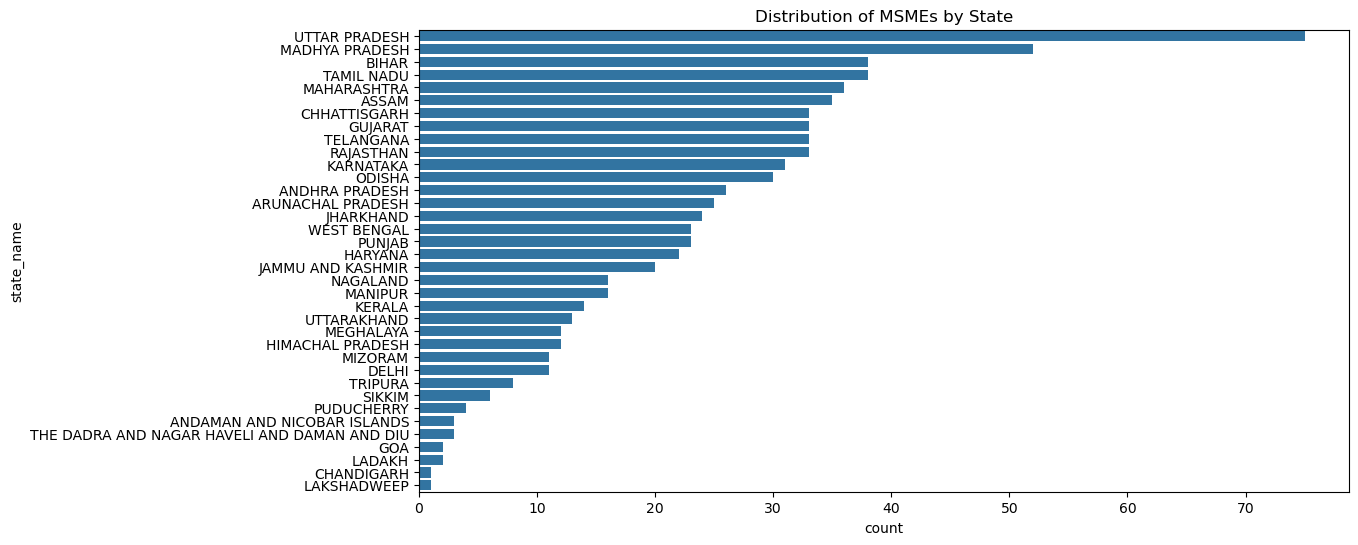

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(y='state_name', data=df, order=df['state_name'].value_counts().index)
plt.title('Distribution of MSMEs by State')
plt.show()

### Plot MSME Business Size Distribution

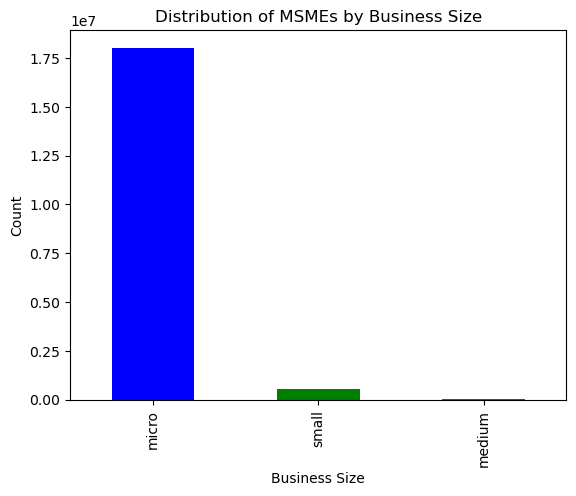

In [63]:
df[['micro', 'small', 'medium']].sum().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of MSMEs by Business Size')
plt.xlabel('Business Size')
plt.ylabel('Count')
plt.show()

# Segmenting users based on data

### Selecting Features for Clustering

In [64]:
df['total'] = df[['micro', 'small', 'medium']].sum(axis=1)
clustering_data = df[['state_name', 'total']].copy()

### Encode Categorical Data to encode the state_name column to numerical values.

In [65]:
from sklearn.preprocessing import LabelEncoder

clustering_data.loc[:, 'state_encoded'] = LabelEncoder().fit_transform(clustering_data['state_name'])
clustering_data = clustering_data[['state_encoded', 'total']]

### trying clustering data using K-Means.

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

### Plot Visualising Clusters

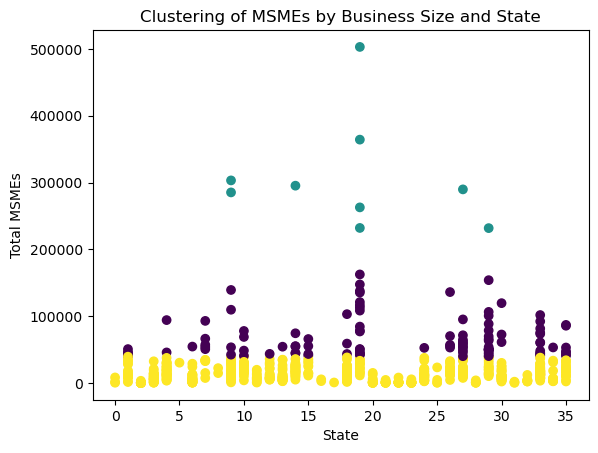

In [67]:
plt.scatter(clustering_data['state_encoded'], clustering_data['total'], c=clustering_data['cluster'], cmap='viridis')
plt.title('Clustering of MSMEs by Business Size and State')
plt.xlabel('State')
plt.ylabel('Total MSMEs')
plt.show()

The clustering visualization demonstrates how MSMEs are grouped by total business size across different states, providing a clearer understanding of regional trends in MSME distribution. Key insights include:

1.	Cluster Distribution: The three distinct clusters highlight varying levels of MSME density by state. For example, states with higher total MSMEs appear in one cluster (shown in yellow), suggesting that these regions may have a larger base of smaller businesses, while other clusters show lower density, possibly indicative of fewer but larger businesses.
2.	State-Wise Insights: The encoding of states as numerical values allows for state-level comparisons. States with higher numbers of MSMEs stand out, indicating potential focus areas for product offerings tailored to the needs of dense MSME populations.
3.	Tailored Strategies for High-Density Regions: States with high MSME counts might benefit from additional support resources or financing options to help businesses scale. Meanwhile, regions with fewer MSMEs could benefit from outreach initiatives aimed at fostering new business growth.

This clustering prototype can help the platform tailor its features and services based on regional demand, laying the groundwork for more personalized and region-specific support strategies for MSMEs.